<h1>Sensing & The Internet of Things</h1>

<h2>Gareth Jones, Data Analysis</h2>

In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import os
import numpy as np
import csv
import scipy
import statsmodels
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn import metrics


# matplotlib configuration

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 150
plt.rcParams['figure.figsize'] = 20, 10

def newfigure(*args, **kwargs):
    fig, ax = plt.subplots(*args, **kwargs)
    for i, a in enumerate(fig.axes):
        a.tick_params(direction='in', grid_linestyle=":", top=True, right=True)
        a.grid(which='major', axis='both', linestyle=":")
    return fig, ax

#Importing Weather Data into Pandas
Sheets1 = 'https://docs.google.com/spreadsheets/d/1nq8QE5mjT76Mq2Cyw2Y4oLcfB93U4OZfoYV0nJIf6Lc/export?format=csv&gid=0'
WeatherData = pd.read_csv(Sheets1)
WeatherData['Datetime'] = pd.to_datetime(WeatherData['Datetime'], format='%d/%m/%Y %H:%M')
WeatherData = WeatherData.set_index(list(WeatherData)[0])
WeatherData.head()

#Importing Step Data into Pandas
Sheets2 = 'https://docs.google.com/spreadsheets/d/1cl5J43yQGtbO-HfuY0Q5Qh6S8Ahxl8xwiZoQnGNJbdU/export?format=csv&gid=0'
StepData = pd.read_csv(Sheets2)
StepData['Datetime'] = pd.to_datetime(StepData['Datetime'], format='%d/%m/%Y %H:%M')
StepData = StepData.set_index(list(StepData)[0])
StepData.head()

/Users/garethjones/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


,Steps
Datetime,
2019-12-28 00:00:00,0
2019-12-28 01:00:00,0
2019-12-28 02:00:00,0
2019-12-28 03:00:00,0
2019-12-28 04:00:00,0


In [3]:
Weather = {'Haze': 9, 'Fog': 8, 'Mist': 7, 'Clear': 6, 'Clouds': 5, 'Rain': 4,'Snow': 3,'Drizzle': 2,'Thunderstorm': 1} 
WeatherData.Weather = [Weather[item] for item in WeatherData.Weather] 
WeatherData.head()

#Resampling the Weather Data and searching for the mean across a day from hourly data for basic trend analysis.
Weather_Day = WeatherData.resample('D').mean()
Weather_Day.to_csv('WeatherData_day.csv')
Weather_Day.head()

#Resampling the Step Data and summing the total steps taken over the day for basic trend analysis.
steps_day = StepData.resample('D').sum()
steps_day.to_csv('StepData_day.csv')
steps_day.head()

,Steps
Datetime,
2019-12-28,1129
2019-12-29,3399
2019-12-30,13663
2019-12-31,12537
2020-01-01,15698


/Users/garethjones/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


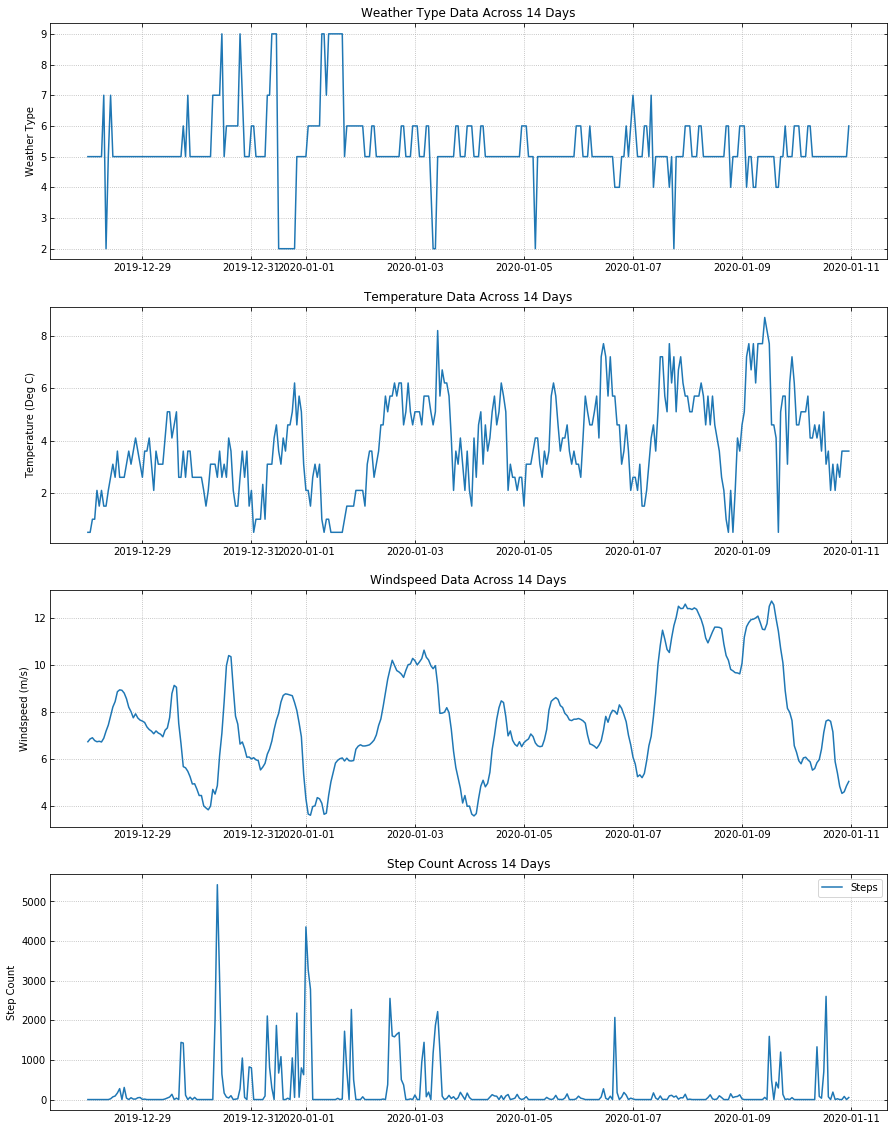

In [4]:
#Sampling
from pandas.plotting import register_matplotlib_converters

fig, ax = newfigure(4, figsize=(15,20))

a = WeatherData['Weather']
b = WeatherData['Temperature']
c = WeatherData['Windspeed']
d = StepData['Steps']

ax[0].plot(a,label='Weather Type')
ax[0].set_ylabel('Weather Type')
ax[0].set_title("Weather Type Data Across 14 Days")

ax[1].plot(b,label='Temperature')
ax[1].set_ylabel('Temperature (Deg C)')
ax[1].set_title("Temperature Data Across 14 Days")

ax[2].plot(c,label='Windspeed')
ax[2].set_ylabel('Windspeed (m/s)')
ax[2].set_title("Windspeed Data Across 14 Days")

ax[3].plot(d,label='Steps')
ax[3].set_ylabel('Step Count')
ax[3].set_title("Step Count Across 14 Days")

plt.legend()
plt.show()
fig.savefig("Graphs/fig1.jpg")

In [ ]:
fig = plt.figure(1,figsize=(20,10))

fig,
x = plt.plot(WeatherData['Weather'],label='Weather')
y = plt.plot(WeatherData['Temperature'],label='Temperature')
z = plt.plot(WeatherData['Windspeed'],label='Windspeed')
w = (x, y, z)

plt.ylabel("Weather Type")
plt.title("London Weather Data Across 14 Days")
plt.legend()
plt.show(w)
fig.savefig("Graphs/fig2.jpg")

In [ ]:
#Weather vs Steps Figure
fig1, ax1 = plt.subplots(1,figsize=(20,10))

ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Weather Type')
ax1.set_title('Weather Data vs Step Count Across Time')
ax1.plot(Weather_Day['Weather'], color='red')

ax2 = ax1.twinx() #Used for twin x axis
ax2.set_ylabel('Step Count')
ax2.plot(steps_day['Steps'], color='blue')

fig1.tight_layout()
plt.show()
fig1.savefig('Graphs/fig3.jpg')

#Temperature vs Steps Figure
fig2, ax1 = plt.subplots(1,figsize=(20,10))

ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature vs Step Count Across Time')
ax1.plot(Weather_Day['Temperature'], color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Step Count')
ax2.plot(steps_day['Steps'], color='blue')

fig2.tight_layout()
plt.show()
fig2.savefig('Graphs/fig4.jpg')

#Windspeed vs Steps Figure
fig3, ax1 = plt.subplots(1,figsize=(20,10))

ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Windspeed')
ax1.set_title('Windspeed vs Step Count Across Time')
ax1.plot(Weather_Day['Windspeed'], color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Step Count')
ax2.plot(steps_day['Steps'], color='blue')

fig3.tight_layout()
plt.show()
fig3.savefig('Graphs/fig5.jpg')

In [ ]:
#Resampling

Steps = StepData['Steps'].resample("1440min").sum().rename('Steps')

sampling = "1440min"

weather = WeatherData["Weather"].resample(sampling).mean().rename('Weather')
temperature = WeatherData["Temperature"].resample(sampling).mean().rename('Temperature')
windspeed = WeatherData["Windspeed"].resample(sampling).mean().rename('Windspeed')



resampled_data = pd.concat([weather, temperature, windspeed, Steps], axis=1)
resampled_data.rename_axis('TIME', inplace=True)
resampled_data = resampled_data.iloc[4:]
resampled_data.head()

fig,  axs = newfigure(len(resampled_data.columns.values), 2, figsize=(20,10), sharex=True)

for i, name in enumerate(resampled_data.columns.values):
    axs[i,0].xaxis.set_tick_params(rotation=70)
    axs[i,0].plot(resampled_data[name], label=name)
    axs[i,0].legend()
    axs[i,0].set_ylabel(name)
    resampled_data[name] = resampled_data[name].interpolate('linear')
    
    axs[i,1].xaxis.set_tick_params(rotation=70)
    axs[i,1].plot(resampled_data[name])
    
axs[0,0].set_title('Resample data')
axs[0,1].set_title('Resampled & interpolated data')
plt.show()
fig.savefig("Graphs/fig6.jpg")

In [ ]:
#Decomposition
trend_data = []
for i, name in enumerate(resampled_data.columns.values):
    decomposed = sm.tsa.seasonal_decompose(resampled_data[name], freq=1)
    trend_data.append(decomposed.trend)
    figure = decomposed.plot()
    figure.axes[0].set_title(name)
    figure.set_size_inches(20,10)
    
trends = pd.concat(trend_data, axis=1)
plt.show()
figure.savefig("Graphs/fig7.jpg")

In [ ]:
#Normalising Data

new_data = resampled_data.copy(deep=True)
new_trends = trends.copy(deep=True)

stats = {}

for name in new_data.columns.values:
    mean = np.mean(new_data[name])
    stdv = np.std(new_data[name])
    stats[name] = {"mean":mean, "stdv":stdv}
    new_data[name] = (new_data[name] - mean) / stdv
    
for name in trends.columns.values:
    trends[name] = (trends[name] - np.mean(trends[name])) / np.std(trends[name])
    
fig, axs = newfigure()

for name in new_data.columns.values:
    axs.xaxis.set_tick_params(rotation=70)
    axs.plot(new_data[name], label=name)
    
axs.set_title("Normalised Data - Source")
axs.legend()
plt.show()
fig.savefig("Graphs/fig8.jpg")

In [ ]:
fig, axs = newfigure()

for name in new_trends.columns.values:
    axs.xaxis.set_tick_params(rotation=70)
    axs.plot(new_trends[name], label=name)
    
axs.set_title("Normalised data trends against time")
axs.legend()
plt.show()
fig.savefig("Graphs/fig9.jpg")

In [ ]:
#Autocorrelation and partial autocorrelation plotting

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_lags = 500
pacf_lags = 10
fig, axs = newfigure(len(resampled_data.columns.values), 2, figsize=(15,10), sharey=True)
fig.tight_layout()

for i, name in enumerate(resampled_data.columns.values):
    acf_results = statsmodels.tsa.stattools.acf(resampled_data[name], nlags=acf_lags)
    pacf_results = statsmodels.tsa.stattools.pacf(resampled_data[name], nlags=pacf_lags)
    
    axs[i,0].plot(acf_results, label=name)
    axs[i,0].set_ylabel(name)
    axs[i,1].plot(pacf_results, label=name)
    axs[i,0].legend()
    axs[i,1].legend()
    
axs[0,0].set_title("Autocorrelation Function")
axs[0,1].set_title("Partial Autocorrelation Function")
fig.tight_layout()
plt.show()
fig.savefig("Graphs/fig10.jpg")

In [ ]:
#Scatter matrix

def plot_scatter_matrix(data):
    
    dim = len(data.columns.values)
    fig, axs = newfigure(dim, dim, sharex='col', sharey='row', figsize=(10,10))
    fig.tight_layout()
    for row, iname in enumerate(data.columns.values):
        for col, jname in enumerate(data.columns.values):
            axs[row,col].scatter(data[jname], data[iname], s=5)
            
            
            if col == 0:
                axs[row,col].set_ylabel(iname)
            if row == len(data.columns.values)-1:
                axs[row,col].set_xlabel(jname)
    return fig, axs

fig, axs = plot_scatter_matrix(new_data)
fig.tight_layout()
plt.show()
fig.savefig("Graphs/fig11.jpg")